# Notes
(1) Requires spglib. All examples show below are run with ISYM = 3 in VASP.  
(2) Run VASP SCF (LCHARG=T), then non-SCF (ICHARG=11 and LWAVE=T)  with finer K-mesh.  
    When running non-SCF, if magnetic, MAGMOM in INCAR is necessary (even though VASP reads CHGCAR). This is because PAOFLOW reads the MAGMOM tag in vasprun.xml to determine the symmetry, which comes from INCAR.  
(3) PAOFLOW reads "vasprun.xml" and "WAVECAR", make sure they are in the directory.   
(4) If using VASP, when calling pao_hamiltonian(), DO NOT set "open_wedge=False" even if symmetry is turned off (ISYM = -1). This is because VASP uses a different set of k-mesh and a mapping between the k-points is required.

In [1]:
# Change PAOFLOW export directory if necessary
from src.PAOFLOW import PAOFLOW
import numpy as np
import matplotlib.pyplot as plt

# Example01: Si

In [2]:
paoflow = PAOFLOW(savedir='examples_vasp/vasp_Si', 
                  model=None, 
                  outputdir='examples_vasp/vasp_Si/output', 
                  verbose=True,
                  dft="VASP")
data_controller = paoflow.data_controller
arry,attr = paoflow.data_controller.data_dicts()


#############################################################################################
#                                                                                           #
#                                          PAOFLOW                                          #
#                                                                                           #
#                  Utility to construct and operate on Hamiltonians from                    #
#                 the Projections of DFT wfc on Atomic Orbital bases (PAO)                  #
#                                                                                           #
#                       (c)2016-2024 ERMES group (http://ermes.unt.edu)                     #
#############################################################################################

VASP version: 6.2.0  
Monkhorst and Pack grid: 12 12 12 0 0 0
Number of kpoints: 72
Number of electrons: 8.000000
Number of bands: 18
Insulator: True
Ma

In [3]:
attr['basispath'] = './BASIS/'
arry['configuration'] = {'Si':['3S','3P','3D','4S','4P','4F']}
paoflow.projections(internal=True)  # "internal=True" is optional, always use internal basis when dft == 'VASP'

atom: Si  AEWFC: ./BASIS/Si\3S.dat               tau: [0. 0. 0.]
atom: Si  AEWFC: ./BASIS/Si\3P.dat               tau: [0. 0. 0.]
atom: Si  AEWFC: ./BASIS/Si\3D.dat               tau: [0. 0. 0.]
atom: Si  AEWFC: ./BASIS/Si\4S.dat               tau: [0. 0. 0.]
atom: Si  AEWFC: ./BASIS/Si\4P.dat               tau: [0. 0. 0.]
atom: Si  AEWFC: ./BASIS/Si\4F.dat               tau: [0. 0. 0.]
      atwfc:   1  3S  l=0, m=1
      atwfc:   2  3P  l=1, m=1
      atwfc:   3  3P  l=1, m=2
      atwfc:   4  3P  l=1, m=3
      atwfc:   5  3D  l=2, m=1
      atwfc:   6  3D  l=2, m=2
      atwfc:   7  3D  l=2, m=3
      atwfc:   8  3D  l=2, m=4
      atwfc:   9  3D  l=2, m=5
      atwfc:  10  4S  l=0, m=1
      atwfc:  11  4P  l=1, m=1
      atwfc:  12  4P  l=1, m=2
      atwfc:  13  4P  l=1, m=3
      atwfc:  14  4F  l=3, m=1
      atwfc:  15  4F  l=3, m=2
      atwfc:  16  4F  l=3, m=3
      atwfc:  17  4F  l=3, m=4
      atwfc:  18  4F  l=3, m=5
      atwfc:  19  4F  l=3, m=6
      atwfc:  20  4F 

In [4]:
paoflow.projectability()

Projectability vector  [0.99545429 0.99236617 0.99054065 0.98887027 0.9886738  0.98537975
 0.98320259 0.98132912 0.98231753 0.98544492 0.97823829 0.97547007
 0.96801959 0.96032555 0.95707135 0.93447649 0.92020483 0.89566517]
# of bands with good projectability > 0.95 = 15
Range of suggested shift  15.90873178  ,  22.52683178
Projectability in:                          0.036 sec


In [5]:
paoflow.pao_hamiltonian()

Building Hks in:                            1.346 sec
k -> R in:                                  0.314 sec


In [6]:
paoflow.bands(ibrav=2,nk=500)

Bands in:                                   0.814 sec


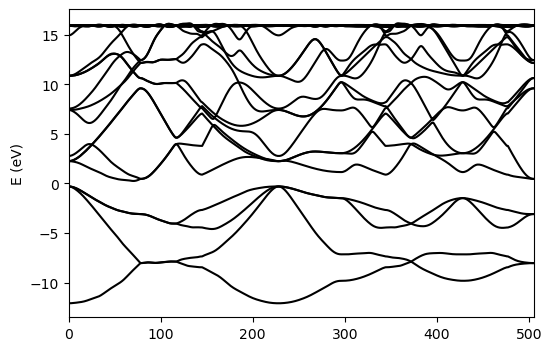

In [7]:
fig = plt.figure(figsize=(6,4))
eband = arry['E_k']
plt.plot(eband[:,0],color='black')
for ib in range(1,eband.shape[1]):
    plt.plot(eband[:,ib],color='black')
plt.xlim([0,eband.shape[0]-1])
plt.ylabel("E (eV)")
plt.show()
# plt.savefig('Si_VASP.png',bbox_inches='tight')  

# Example02: Pt (with SOC)

In [8]:
paoflow = PAOFLOW(savedir='examples_vasp/vasp_Pt',
                  model=None,
                  outputdir='examples_vasp/vasp_Pt/output', 
                  verbose=True,
                  dft="VASP")
data_controller = paoflow.data_controller
arry,attr = paoflow.data_controller.data_dicts()


#############################################################################################
#                                                                                           #
#                                          PAOFLOW                                          #
#                                                                                           #
#                  Utility to construct and operate on Hamiltonians from                    #
#                 the Projections of DFT wfc on Atomic Orbital bases (PAO)                  #
#                                                                                           #
#                       (c)2016-2024 ERMES group (http://ermes.unt.edu)                     #
#############################################################################################

VASP version: 6.2.0  
Monkhorst and Pack grid: 12 12 12 0 0 0
Number of kpoints: 72
Number of electrons: 10.000000
Number of bands: 20
Insulator: False


In [9]:
attr['basispath'] = './BASIS/'
arry['configuration'] = {'Pt':['5D','6S','6P','7S','7P']}
paoflow.projections(internal=True)  # "internal=True" is optional, always use internal basis when dft == 'VASP'

atom: Pt  AEWFC: ./BASIS/Pt\5D.dat               tau: [0. 0. 0.]
atom: Pt  AEWFC: ./BASIS/Pt\6S.dat               tau: [0. 0. 0.]
atom: Pt  AEWFC: ./BASIS/Pt\6P.dat               tau: [0. 0. 0.]
atom: Pt  AEWFC: ./BASIS/Pt\7S.dat               tau: [0. 0. 0.]
atom: Pt  AEWFC: ./BASIS/Pt\7P.dat               tau: [0. 0. 0.]
      atwfc:   1  5D  l=2, m=1
      atwfc:   2  5D  l=2, m=2
      atwfc:   3  5D  l=2, m=3
      atwfc:   4  5D  l=2, m=4
      atwfc:   5  5D  l=2, m=5
      atwfc:   6  5D  l=2, m=1
      atwfc:   7  5D  l=2, m=2
      atwfc:   8  5D  l=2, m=3
      atwfc:   9  5D  l=2, m=4
      atwfc:  10  5D  l=2, m=5
      atwfc:  11  6S  l=0, m=1
      atwfc:  12  6S  l=0, m=1
      atwfc:  13  6P  l=1, m=1
      atwfc:  14  6P  l=1, m=2
      atwfc:  15  6P  l=1, m=3
      atwfc:  16  6P  l=1, m=1
      atwfc:  17  6P  l=1, m=2
      atwfc:  18  6P  l=1, m=3
      atwfc:  19  7S  l=0, m=1
      atwfc:  20  7S  l=0, m=1
      atwfc:  21  7P  l=1, m=1
      atwfc:  22  7P  l=

In [10]:
paoflow.projectability()

Projectability vector  [0.98378247 0.98377555 0.9664084  0.96639923 0.96572662 0.96572693
 0.95536536 0.95536281 0.95205075 0.95204394 0.95756134 0.95755714
 0.84209774 0.84207072 0.63588513 0.63584591 0.73980118 0.73991766
 0.48708985 0.48524363]
# of bands with good projectability > 0.95 = 12
Range of suggested shift  5.49489934  ,  16.76739934
Projectability in:                          0.049 sec


In [11]:
paoflow.pao_hamiltonian(expand_wedge=True)

Building Hks in:                            1.457 sec
k -> R in:                                  0.170 sec


In [12]:
paoflow.bands(ibrav=2,nk=500)

Bands in:                                   0.540 sec


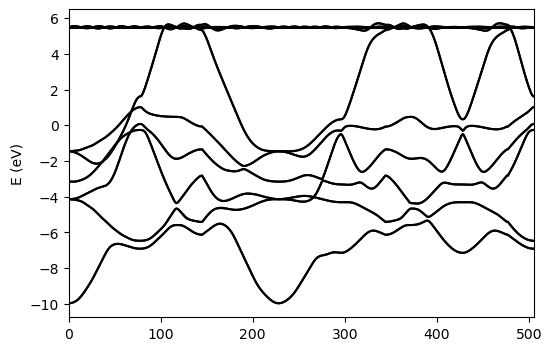

In [13]:
fig = plt.figure(figsize=(6,4))
eband = arry['E_k']
for ib in range(eband.shape[1]):
    plt.plot(eband[:,ib],color='black')
plt.xlim([0,eband.shape[0]-1])
plt.ylabel("E (eV)")
plt.show()

In [14]:
paoflow.interpolated_hamiltonian()
paoflow.pao_eigh()
paoflow.gradient_and_momenta()
paoflow.adaptive_smearing()

Performing Fourier interpolation on a larger grid.
d : nk -> nfft
1 : 12 -> 24
2 : 12 -> 24
3 : 12 -> 24
New estimated maximum array size: 1.79 GBytes
R -> k with Zero Padding in:                1.371 sec
Eigenvalues in:                             8.351 sec
Gradient in:                                3.846 sec
Momenta in:                                20.080 sec
Adaptive Smearing in:                       1.208 sec


In [15]:
paoflow.spin_Hall(emin=-8., emax=4., s_tensor=[[0,1,2]])

Writing bxsf files for Spin Berry Curvature
Spin Hall Conductivity in:                 19.435 sec


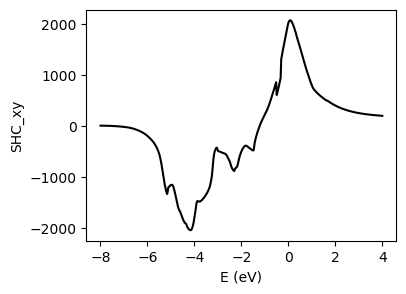

In [16]:
shc = np.loadtxt('examples_vasp/vasp_Pt/output/shcEf_z_xy.dat')
fig = plt.figure(figsize=(4,3))
plt.plot(shc[:,0],shc[:,1],color='black')
plt.xlabel("E (eV)")
plt.ylabel("SHC_xy")
plt.show()

# Example03: Fe (with SOC, FM)

In [17]:
paoflow = PAOFLOW(savedir='examples_vasp/vasp_Fe',
                  model=None,
                  outputdir='examples_vasp/vasp_Fe/output', 
                  verbose=True,
                  dft="VASP")
data_controller = paoflow.data_controller
arry,attr = paoflow.data_controller.data_dicts()


#############################################################################################
#                                                                                           #
#                                          PAOFLOW                                          #
#                                                                                           #
#                  Utility to construct and operate on Hamiltonians from                    #
#                 the Projections of DFT wfc on Atomic Orbital bases (PAO)                  #
#                                                                                           #
#                       (c)2016-2024 ERMES group (http://ermes.unt.edu)                     #
#############################################################################################

VASP version: 6.2.0  
Monkhorst and Pack grid: 12 12 12 0 0 0
Number of kpoints: 242
Number of electrons: 8.000000
Number of bands: 20
Insulator: False


In [18]:
attr['basispath'] = './BASIS/'
arry['configuration'] = {'Fe':['3P','3D','4S','4P','4D']}
paoflow.projections(internal=True)

atom: Fe  AEWFC: ./BASIS/Fe\3P.dat               tau: [0. 0. 0.]
atom: Fe  AEWFC: ./BASIS/Fe\3D.dat               tau: [0. 0. 0.]
atom: Fe  AEWFC: ./BASIS/Fe\4S.dat               tau: [0. 0. 0.]
atom: Fe  AEWFC: ./BASIS/Fe\4P.dat               tau: [0. 0. 0.]
atom: Fe  AEWFC: ./BASIS/Fe\4D.dat               tau: [0. 0. 0.]
      atwfc:   1  3P  l=1, m=1
      atwfc:   2  3P  l=1, m=2
      atwfc:   3  3P  l=1, m=3
      atwfc:   4  3P  l=1, m=1
      atwfc:   5  3P  l=1, m=2
      atwfc:   6  3P  l=1, m=3
      atwfc:   7  3D  l=2, m=1
      atwfc:   8  3D  l=2, m=2
      atwfc:   9  3D  l=2, m=3
      atwfc:  10  3D  l=2, m=4
      atwfc:  11  3D  l=2, m=5
      atwfc:  12  3D  l=2, m=1
      atwfc:  13  3D  l=2, m=2
      atwfc:  14  3D  l=2, m=3
      atwfc:  15  3D  l=2, m=4
      atwfc:  16  3D  l=2, m=5
      atwfc:  17  4S  l=0, m=1
      atwfc:  18  4S  l=0, m=1
      atwfc:  19  4P  l=1, m=1
      atwfc:  20  4P  l=1, m=2
      atwfc:  21  4P  l=1, m=3
      atwfc:  22  4P  l=

In [19]:
paoflow.projectability(pthr=0.85)

Projectability vector  [0.91934065 0.92555982 0.90231424 0.9075009  0.89660788 0.89410842
 0.89673707 0.89954969 0.86947615 0.89642947 0.91378943 0.88213418
 0.90643802 0.89018919 0.88639971 0.87168193 0.84598311 0.83298231
 0.67210555 0.66286774]
# of bands with good projectability > 0.85 = 16
Range of suggested shift  10.854187460000002  ,  25.160487460000002
Projectability in:                          0.064 sec


In [20]:
paoflow.pao_hamiltonian(expand_wedge=True)

Building Hks in:                            0.921 sec
k -> R in:                                  0.270 sec


In [21]:
paoflow.bands(ibrav=3,nk=500)

Bands in:                                   0.671 sec


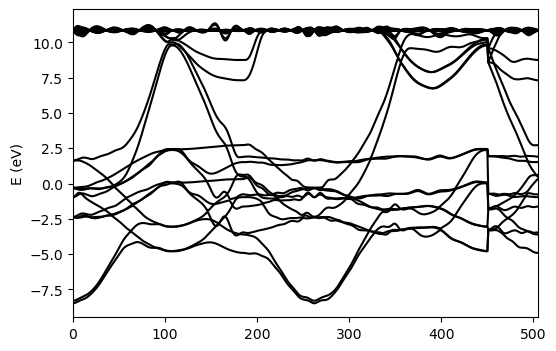

In [22]:
fig = plt.figure(figsize=(6,4))
eband = arry['E_k']
plt.plot(eband[:,0],color='black',label="k = 12*12*12")
for ib in range(1,eband.shape[1]):
    plt.plot(eband[:,ib],color='black')
plt.xlim([0,eband.shape[0]-1])
plt.ylabel("E (eV)")
plt.show()
# plt.savefig('Fe_VASP.png',bbox_inches='tight')

In [23]:
paoflow.interpolated_hamiltonian()
paoflow.pao_eigh()
paoflow.gradient_and_momenta()
paoflow.adaptive_smearing()

Performing Fourier interpolation on a larger grid.
d : nk -> nfft
1 : 12 -> 24
2 : 12 -> 24
3 : 12 -> 24
New estimated maximum array size: 3.07 GBytes
R -> k with Zero Padding in:                1.835 sec
Eigenvalues in:                             7.269 sec
Gradient in:                               18.769 sec
Momenta in:                                13.298 sec
Adaptive Smearing in:                       2.312 sec


In [24]:
paoflow.anomalous_Hall(do_ac=True, emin=-6., emax=4., a_tensor=np.array([[0,1]]))

Writing bxsf files for Berry Curvature
Anomalous Hall Conductivity in:           457.955 sec


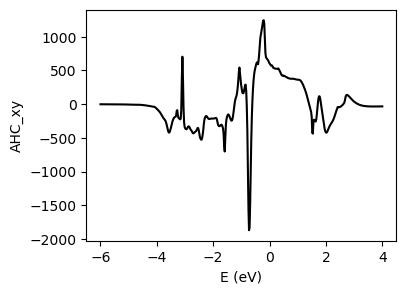

In [25]:
ahc = np.loadtxt('./examples_vasp/vasp_Fe/output/ahcEf_xy.dat')
fig = plt.figure(figsize=(4,3))
plt.xlabel("E (eV)")
plt.ylabel("AHC_xy")
plt.plot(ahc[:,0],ahc[:,1],color='black')
plt.show()

# Example04: MnF2 (nspin=2, collinear AFM)

In [26]:
paoflow = PAOFLOW(savedir='examples_vasp/vasp_MnF2',
                  model=None,
                  outputdir='examples_vasp/vasp_MnF2/output', 
                  verbose=True,
                  dft="VASP")
data_controller = paoflow.data_controller
arry,attr = paoflow.data_controller.data_dicts()


#############################################################################################
#                                                                                           #
#                                          PAOFLOW                                          #
#                                                                                           #
#                  Utility to construct and operate on Hamiltonians from                    #
#                 the Projections of DFT wfc on Atomic Orbital bases (PAO)                  #
#                                                                                           #
#                       (c)2016-2024 ERMES group (http://ermes.unt.edu)                     #
#############################################################################################

VASP version: 6.2.0  
Monkhorst and Pack grid: 8 8 12 0 0 0
Number of kpoints: 105
Number of electrons: 42.000000
Number of bands: 36
Insulator: True
Ma

In [27]:
attr['basispath'] = './BASIS/'
arry['configuration'] = {'Mn':['3P','3D','4S','4P','4D'],
                        'F':['3S','3P','3D','4F']}
paoflow.projections(internal=True) 

atom: Mn  AEWFC: ./BASIS/Mn\3P.dat               tau: [0. 0. 0.]
atom: Mn  AEWFC: ./BASIS/Mn\3D.dat               tau: [0. 0. 0.]
atom: Mn  AEWFC: ./BASIS/Mn\4S.dat               tau: [0. 0. 0.]
atom: Mn  AEWFC: ./BASIS/Mn\4P.dat               tau: [0. 0. 0.]
atom: Mn  AEWFC: ./BASIS/Mn\4D.dat               tau: [0. 0. 0.]
      atwfc:   1  3P  l=1, m=1
      atwfc:   2  3P  l=1, m=2
      atwfc:   3  3P  l=1, m=3
      atwfc:   4  3D  l=2, m=1
      atwfc:   5  3D  l=2, m=2
      atwfc:   6  3D  l=2, m=3
      atwfc:   7  3D  l=2, m=4
      atwfc:   8  3D  l=2, m=5
      atwfc:   9  4S  l=0, m=1
      atwfc:  10  4P  l=1, m=1
      atwfc:  11  4P  l=1, m=2
      atwfc:  12  4P  l=1, m=3
      atwfc:  13  4D  l=2, m=1
      atwfc:  14  4D  l=2, m=2
      atwfc:  15  4D  l=2, m=3
      atwfc:  16  4D  l=2, m=4
      atwfc:  17  4D  l=2, m=5
atom: Mn  AEWFC: ./BASIS/Mn\3P.dat               tau: [4.68219993 4.68219993 3.15297726]
atom: Mn  AEWFC: ./BASIS/Mn\3D.dat               tau: [4.68

In [28]:
paoflow.projectability(pthr=0.85)

Projectability vector  [0.93565425 0.96063729 0.96194732 0.96183498 0.95638907 0.95649008
 0.95223096 0.94884742 0.94764465 0.95037196 0.95061394 0.95184821
 0.94580618 0.9468576  0.95190371 0.95089621 0.87241991 0.88435548
 0.88325011 0.87381938 0.88414889 0.90920219 0.90951314 0.90728063
 0.90894793 0.89731937 0.92610859 0.95864061 0.96878697 0.9701202
 0.96754537 0.96983697 0.97145769 0.97067052 0.97000004 0.9667312 ]
# of bands with good projectability > 0.85 = 36
Projectability in:                          0.091 sec


In [29]:
paoflow.pao_hamiltonian()

Building Hks in:                            3.542 sec
k -> R in:                                  1.273 sec


In [30]:
paoflow.bands(ibrav=6,nk=500)

Bands in:                                   5.772 sec


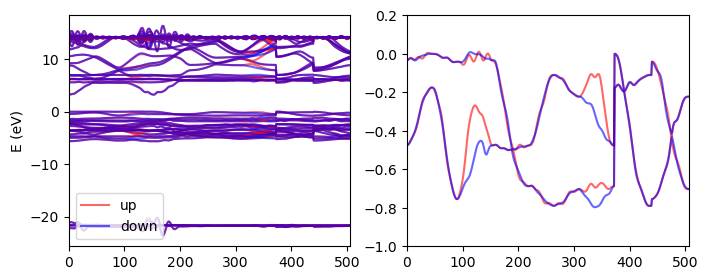

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,3))
# plot the paoflow bands (all bands and bands near Fermi energy)
eband = arry['E_k']
ax[0].plot(eband[:,0,0],color='red',alpha=0.6,label="up")
ax[0].plot(eband[:,0,1],color='blue',alpha=0.6,label="down")
for ib in range(1,eband.shape[1]):
    ax[0].plot(eband[:,ib,0],color='red',alpha=0.6)
    ax[0].plot(eband[:,ib,1],color='blue',alpha=0.6)
    ax[1].plot(eband[:,ib,0],color='red',alpha=0.6)
    ax[1].plot(eband[:,ib,1],color='blue',alpha=0.6)
ax[1].set_ylim([-1,0.2])
ax[0].set_xlim([0,eband.shape[0]-1])
ax[1].set_xlim([0,eband.shape[0]-1])
ax[0].set_ylabel("E (eV)")
ax[0].legend()
plt.show()
# plt.savefig('MnF2_VASP.png',bbox_inches='tight')

# Example05: Mn3Ir (with SOC, noncollinear AFM)

In [32]:
paoflow = PAOFLOW(savedir='examples_vasp/vasp_Mn3Ir',
                  model=None,
                  outputdir='examples_vasp/vasp_Mn3Ir/output', 
                  verbose=True,
                  dft="VASP")
data_controller = paoflow.data_controller
arry,attr = paoflow.data_controller.data_dicts()


#############################################################################################
#                                                                                           #
#                                          PAOFLOW                                          #
#                                                                                           #
#                  Utility to construct and operate on Hamiltonians from                    #
#                 the Projections of DFT wfc on Atomic Orbital bases (PAO)                  #
#                                                                                           #
#                       (c)2016-2024 ERMES group (http://ermes.unt.edu)                     #
#############################################################################################

VASP version: 6.2.0  
Monkhorst and Pack grid: 10 10 10 0 0 0
Number of kpoints: 172
Number of electrons: 30.000000
Number of bands: 40
Insulator: False

In [33]:
attr['basispath'] = './BASIS/'
arry['configuration'] = {'Ir':['5P','5D','6S','6P','7S'],
                        'Mn':['3P','3D','4S','4P','4D']}
paoflow.projections(internal=True) 

atom: Ir  AEWFC: ./BASIS/Ir\5P.dat               tau: [0. 0. 0.]
atom: Ir  AEWFC: ./BASIS/Ir\5D.dat               tau: [0. 0. 0.]
atom: Ir  AEWFC: ./BASIS/Ir\6S.dat               tau: [0. 0. 0.]
atom: Ir  AEWFC: ./BASIS/Ir\6P.dat               tau: [0. 0. 0.]
atom: Ir  AEWFC: ./BASIS/Ir\7S.dat               tau: [0. 0. 0.]
      atwfc:   1  5P  l=1, m=1
      atwfc:   2  5P  l=1, m=2
      atwfc:   3  5P  l=1, m=3
      atwfc:   4  5P  l=1, m=1
      atwfc:   5  5P  l=1, m=2
      atwfc:   6  5P  l=1, m=3
      atwfc:   7  5D  l=2, m=1
      atwfc:   8  5D  l=2, m=2
      atwfc:   9  5D  l=2, m=3
      atwfc:  10  5D  l=2, m=4
      atwfc:  11  5D  l=2, m=5
      atwfc:  12  5D  l=2, m=1
      atwfc:  13  5D  l=2, m=2
      atwfc:  14  5D  l=2, m=3
      atwfc:  15  5D  l=2, m=4
      atwfc:  16  5D  l=2, m=5
      atwfc:  17  6S  l=0, m=1
      atwfc:  18  6S  l=0, m=1
      atwfc:  19  6P  l=1, m=1
      atwfc:  20  6P  l=1, m=2
      atwfc:  21  6P  l=1, m=3
      atwfc:  22  6P  l=

In [34]:
paoflow.projectability(pthr=0.9)

Projectability vector  [0.98950007 0.98980826 0.96899053 0.97226495 0.96652035 0.97024332
 0.96396809 0.96949889 0.96529339 0.96553962 0.9607225  0.95821783
 0.95836573 0.95501922 0.94935386 0.94731173 0.94549257 0.9449566
 0.94315058 0.93637946 0.9372998  0.92908459 0.92963646 0.93410546
 0.93440566 0.9367316  0.93623391 0.94260169 0.9432917  0.94364601
 0.93433038 0.9321479  0.92082841 0.90892625 0.90875406 0.91333852
 0.91428356 0.91232389 0.90884599 0.90314062]
# of bands with good projectability > 0.9 = 40
Projectability in:                          0.069 sec


In [35]:
paoflow.pao_hamiltonian()

Building Hks in:                            3.164 sec
k -> R in:                                  1.322 sec


In [36]:
paoflow.bands(ibrav=5,nk=500)

Bands in:                                   5.222 sec


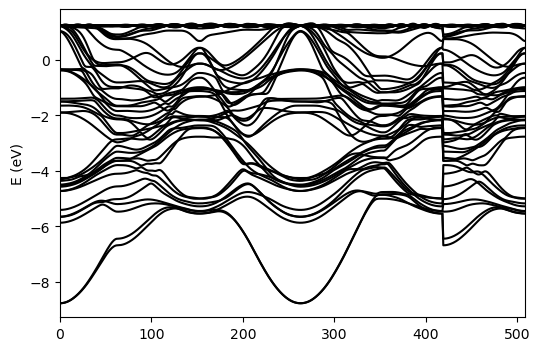

In [37]:
fig = plt.figure(figsize=(6,4))
# plot the paoflow bands
eband = arry['E_k']
for ib in range(eband.shape[1]):
    plt.plot(eband[:,ib],color='black')
plt.xlim([0,eband.shape[0]-1])
plt.ylabel("E (eV)")
plt.show()
# plt.savefig('Mn3Ir_VASP.png',bbox_inches='tight')

# Example06: FeRh (with SOC, FM)

In [38]:
paoflow = PAOFLOW(savedir='examples_vasp/vasp_FeRh_nspin2',
                  model=None,
                  outputdir='examples_vasp/vasp_FeRh/output', 
                  verbose=True,
                  dft="VASP")
data_controller = paoflow.data_controller
arry,attr = paoflow.data_controller.data_dicts()


#############################################################################################
#                                                                                           #
#                                          PAOFLOW                                          #
#                                                                                           #
#                  Utility to construct and operate on Hamiltonians from                    #
#                 the Projections of DFT wfc on Atomic Orbital bases (PAO)                  #
#                                                                                           #
#                       (c)2016-2024 ERMES group (http://ermes.unt.edu)                     #
#############################################################################################

VASP version: 6.2.0  
Monkhorst and Pack grid: 12 12 12 0 0 0
Number of kpoints: 84
Number of electrons: 17.000000
Number of bands: 16
Insulator: False


In [39]:
attr['basispath'] = './BASIS/'
arry['configuration'] = {'Fe':['3P','3D','4S','4P','4D'],
                        'Rh':['4P','4D','5S','5P']}
paoflow.projections(internal=True)

atom: Fe  AEWFC: ./BASIS/Fe\3P.dat               tau: [0. 0. 0.]
atom: Fe  AEWFC: ./BASIS/Fe\3D.dat               tau: [0. 0. 0.]
atom: Fe  AEWFC: ./BASIS/Fe\4S.dat               tau: [0. 0. 0.]
atom: Fe  AEWFC: ./BASIS/Fe\4P.dat               tau: [0. 0. 0.]
atom: Fe  AEWFC: ./BASIS/Fe\4D.dat               tau: [0. 0. 0.]
      atwfc:   1  3P  l=1, m=1
      atwfc:   2  3P  l=1, m=2
      atwfc:   3  3P  l=1, m=3
      atwfc:   4  3D  l=2, m=1
      atwfc:   5  3D  l=2, m=2
      atwfc:   6  3D  l=2, m=3
      atwfc:   7  3D  l=2, m=4
      atwfc:   8  3D  l=2, m=5
      atwfc:   9  4S  l=0, m=1
      atwfc:  10  4P  l=1, m=1
      atwfc:  11  4P  l=1, m=2
      atwfc:  12  4P  l=1, m=3
      atwfc:  13  4D  l=2, m=1
      atwfc:  14  4D  l=2, m=2
      atwfc:  15  4D  l=2, m=3
      atwfc:  16  4D  l=2, m=4
      atwfc:  17  4D  l=2, m=5
atom: Rh  AEWFC: ./BASIS/Rh\4P.dat               tau: [2.83458898 2.83458898 2.83458898]
atom: Rh  AEWFC: ./BASIS/Rh\4D.dat               tau: [2.83

In [40]:
paoflow.projectability(pthr=0.85)

Projectability vector  [0.95931309 0.92417702 0.93739591 0.91328684 0.9133172  0.91216958
 0.8500292  0.86133234 0.87639185 0.88506244 0.89217158 0.93935137
 0.92312376 0.92576617 0.79661917 0.76096841]
# of bands with good projectability > 0.85 = 14
Range of suggested shift  9.22688743  ,  17.200987429999998
Projectability in:                          0.045 sec


In [41]:
paoflow.pao_hamiltonian()

Building Hks in:                            2.226 sec
k -> R in:                                  0.339 sec


In [42]:
paoflow.bands(ibrav=1,nk=500)

Bands in:                                   0.937 sec


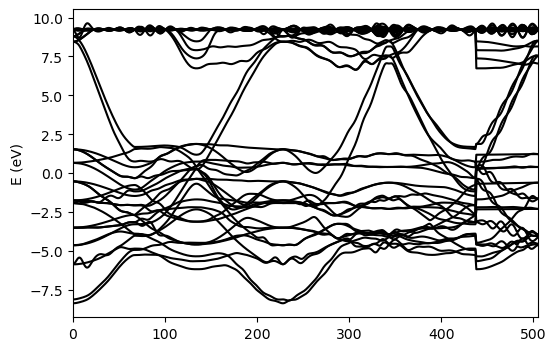

In [43]:
fig = plt.figure(figsize=(6,4))
eband = arry['E_k']
for ib in range(eband.shape[1]):
    plt.plot(eband[:,ib],color='black')
plt.xlim([0,eband.shape[0]-1])
plt.ylabel("E (eV)")
plt.show()
# plt.savefig('FeRh_VASP.png',bbox_inches='tight')  

 # Example06: FeRh (nspin = 2, FM)

In [44]:
paoflow = PAOFLOW(savedir='examples_VASP/vasp_FeRh_nspin2',
                  model=None,
                  outputdir='examples_VASP/vasp_FeRh_nspin2/output', 
                  verbose=True,
                  dft="VASP")
data_controller = paoflow.data_controller
arry,attr = paoflow.data_controller.data_dicts()


#############################################################################################
#                                                                                           #
#                                          PAOFLOW                                          #
#                                                                                           #
#                  Utility to construct and operate on Hamiltonians from                    #
#                 the Projections of DFT wfc on Atomic Orbital bases (PAO)                  #
#                                                                                           #
#                       (c)2016-2024 ERMES group (http://ermes.unt.edu)                     #
#############################################################################################

VASP version: 6.2.0  
Monkhorst and Pack grid: 12 12 12 0 0 0
Number of kpoints: 84
Number of electrons: 17.000000
Number of bands: 16
Insulator: False


In [45]:
attr['basispath'] = './BASIS/'
arry['configuration'] = {'Fe':['3P','3D','4S','4P','4D'],
                        'Rh':['4P','4D','5S','5P']}
paoflow.projections(internal=True)

atom: Fe  AEWFC: ./BASIS/Fe\3P.dat               tau: [0. 0. 0.]
atom: Fe  AEWFC: ./BASIS/Fe\3D.dat               tau: [0. 0. 0.]
atom: Fe  AEWFC: ./BASIS/Fe\4S.dat               tau: [0. 0. 0.]
atom: Fe  AEWFC: ./BASIS/Fe\4P.dat               tau: [0. 0. 0.]
atom: Fe  AEWFC: ./BASIS/Fe\4D.dat               tau: [0. 0. 0.]
      atwfc:   1  3P  l=1, m=1
      atwfc:   2  3P  l=1, m=2
      atwfc:   3  3P  l=1, m=3
      atwfc:   4  3D  l=2, m=1
      atwfc:   5  3D  l=2, m=2
      atwfc:   6  3D  l=2, m=3
      atwfc:   7  3D  l=2, m=4
      atwfc:   8  3D  l=2, m=5
      atwfc:   9  4S  l=0, m=1
      atwfc:  10  4P  l=1, m=1
      atwfc:  11  4P  l=1, m=2
      atwfc:  12  4P  l=1, m=3
      atwfc:  13  4D  l=2, m=1
      atwfc:  14  4D  l=2, m=2
      atwfc:  15  4D  l=2, m=3
      atwfc:  16  4D  l=2, m=4
      atwfc:  17  4D  l=2, m=5
atom: Rh  AEWFC: ./BASIS/Rh\4P.dat               tau: [2.83458898 2.83458898 2.83458898]
atom: Rh  AEWFC: ./BASIS/Rh\4D.dat               tau: [2.83

In [46]:
paoflow.projectability(pthr=0.85)

Projectability vector  [0.95931309 0.92417702 0.93739591 0.91328684 0.9133172  0.91216958
 0.8500292  0.86133234 0.87639185 0.88506244 0.89217158 0.93935137
 0.92312376 0.92576617 0.79661917 0.76096841]
# of bands with good projectability > 0.85 = 14
Range of suggested shift  9.22688743  ,  17.200987429999998
Projectability in:                          0.048 sec


In [47]:
paoflow.pao_hamiltonian()

Building Hks in:                            2.218 sec
k -> R in:                                  0.340 sec


In [48]:
paoflow.bands(ibrav=1,nk=500)

Bands in:                                   0.963 sec


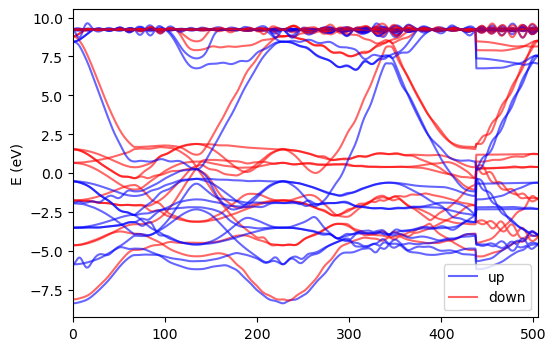

In [49]:
fig = plt.figure(figsize=(6,4))
eband = arry['E_k']
plt.plot(eband[:,0,0],color='blue',alpha=0.6,label="up")
plt.plot(eband[:,0,1],color='red',alpha=0.6,label="down")
for ib in range(1,eband.shape[1]):
    plt.plot(eband[:,ib,0],color='blue',alpha=0.6)
    plt.plot(eband[:,ib,1],color='red',alpha=0.6)
plt.legend()
plt.xlim([0,eband.shape[0]-1])
plt.ylabel("E (eV)")
plt.show()
# plt.savefig('FeRh_VASP_nspin2.png',bbox_inches='tight')  